---
layout: single
title: 'Creating animated maps with matplotlib & basemap in Python'
date: 2016-07-05
authors: [Matt Oakley]
category: [tutorials]
excerpt: 'This tutorial introduces animated maps made with Basemap and Matplotlib. We will animate dots appearing on each capital city in the United States.'
sidebar:
  nav:
author_profile: false
comments: true
lang: [python]
lib: [mpl_toolkits, matplotlib, numpy, pandas, JSAnimation]
---

This tutorial will cover animated maps made with Basemap and Matplotlib. We'll animate dots appearing on each capital city in the United States.

## Objectives

- Get familiar with Basemap
- Animate point location data over the basemap

## Dependencies

- Matplotlib
- Numpy
- pandas
- Basemap ([installation](https://github.com/matplotlib/basemap))
- JSAnimation ([installation](https://gist.github.com/gforsyth/188c32b6efe834337d8a))

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import animation
from matplotlib import pylab
from JSAnimation.IPython_display import display_animation

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 6)

## Plotting a U.S. basemap

Basemap is a Python package which allows us to draw and render out images of the Earth. Therefore, once we get this set up, we'll be able to plot things on top of the map that we've created.

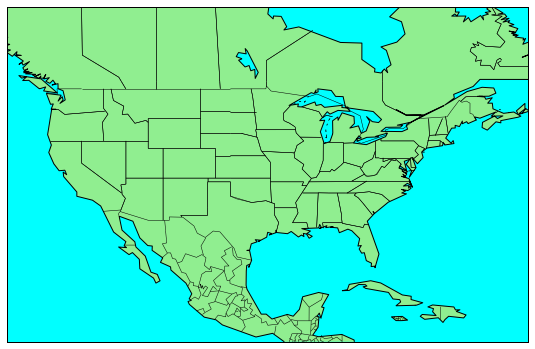

In [2]:
#Center the map over the United States by specifying lat/lon values
def make_map(llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat):
    m = Basemap(llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat)
    m.fillcontinents(color = 'lightgreen', lake_color='aqua')
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    m.drawmapboundary(fill_color='aqua')
    return m

my_map = make_map(llcrnrlon = -130, llcrnrlat = 15, 
                  urcrnrlon = -60, urcrnrlat = 60)

my_map

## Animating points on the map

Now that we have our base map set up,  we now have to create the data that we want to plot as well as the final animation. This is accomplished with matplotlib's animation functionality. For this simple example, we will plot the locations of state capitals sequentially.


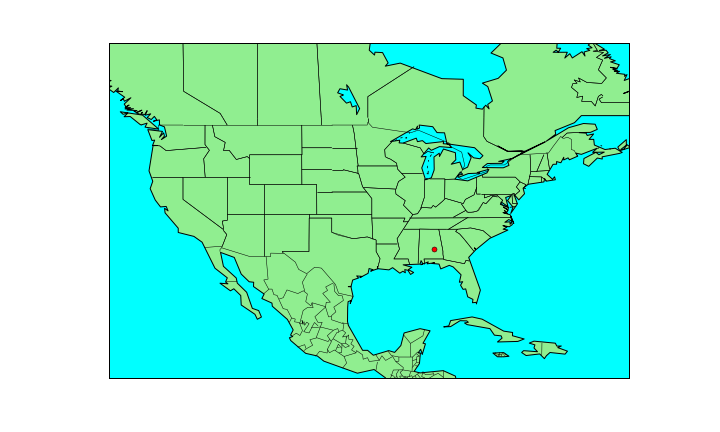
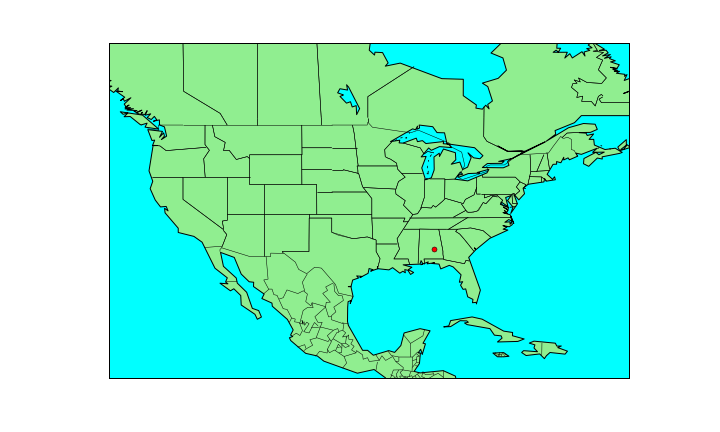
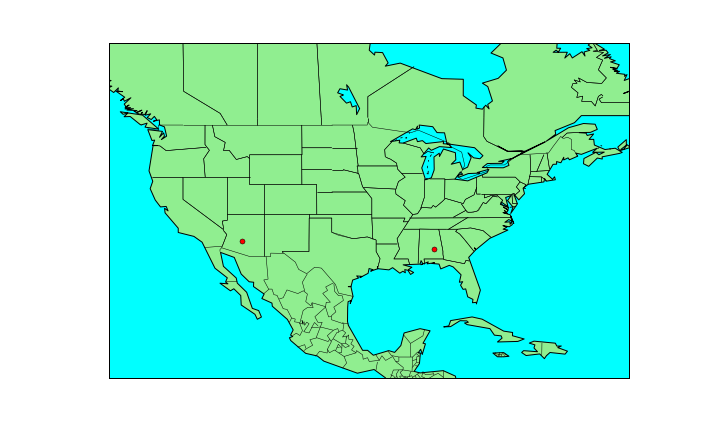
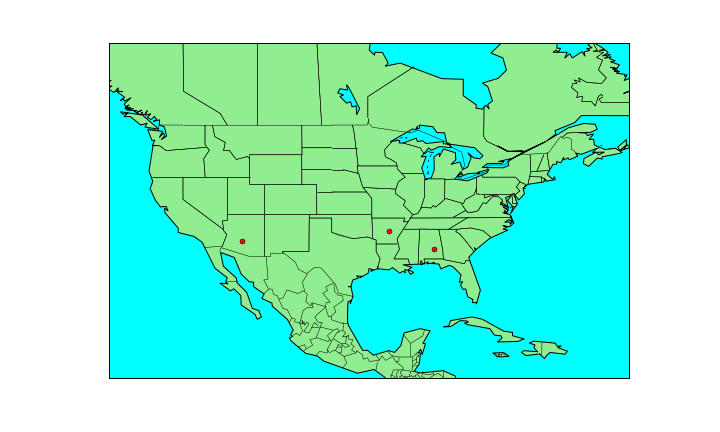
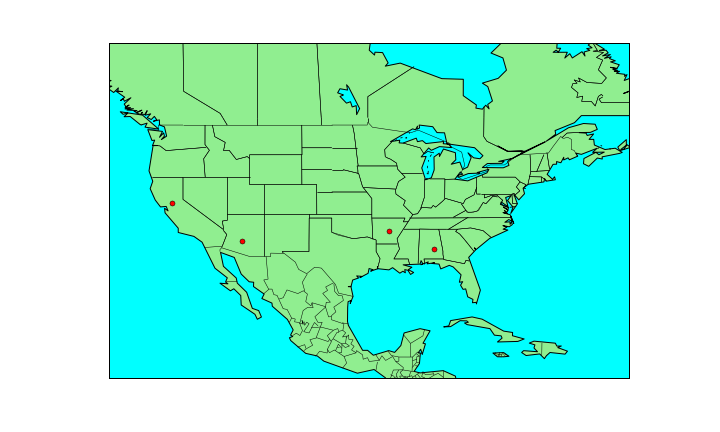
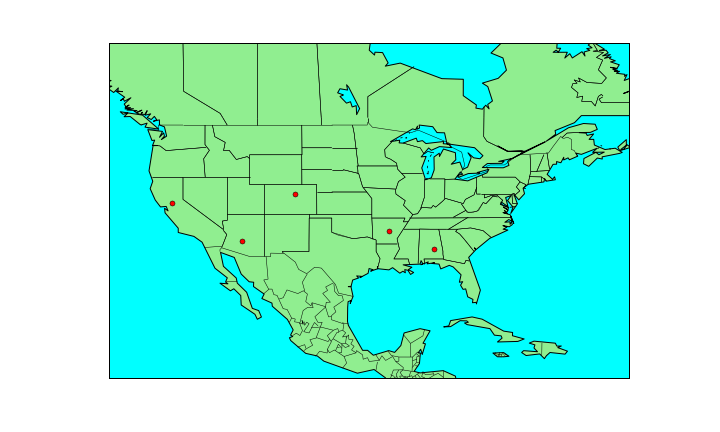
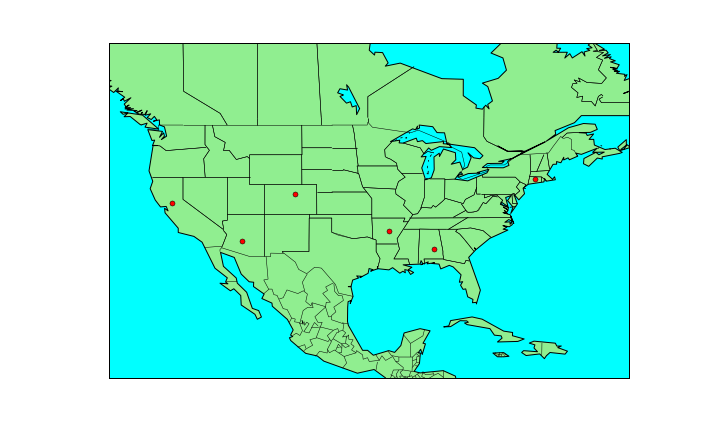
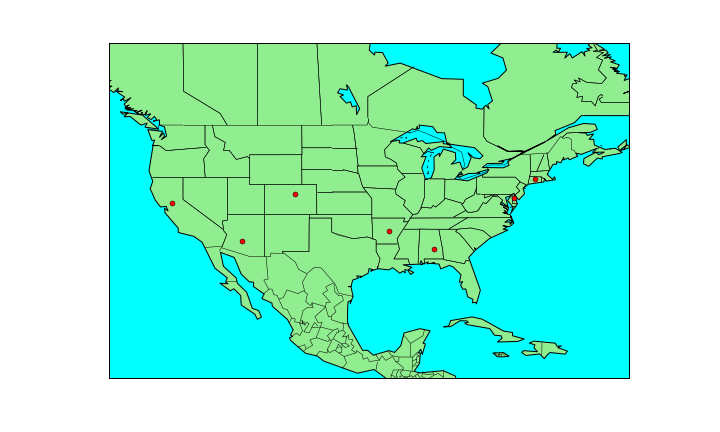
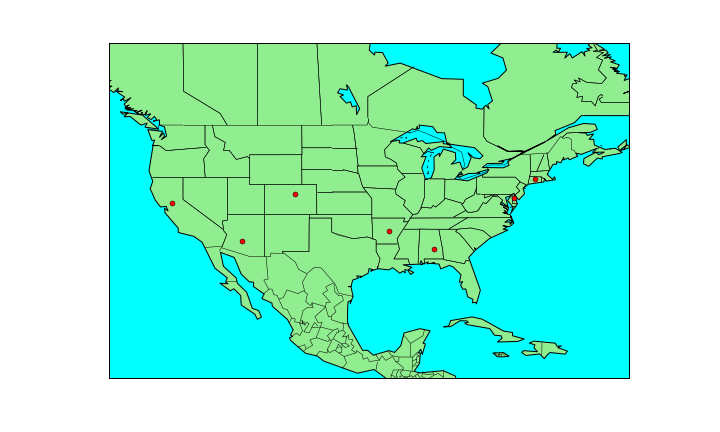
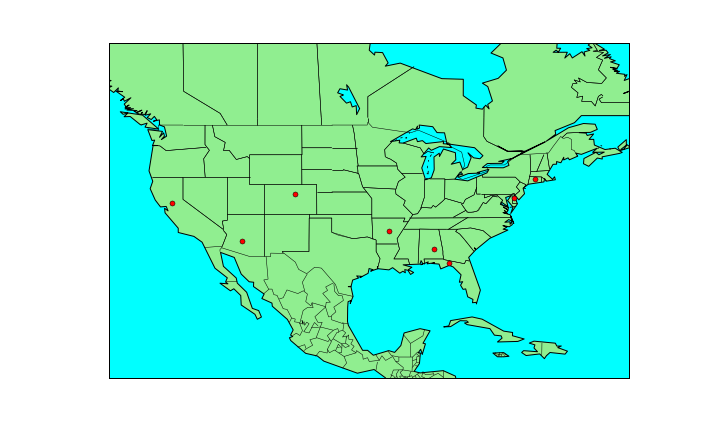
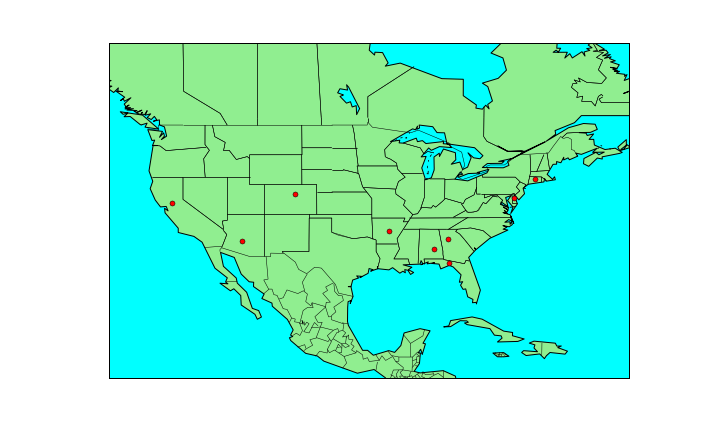
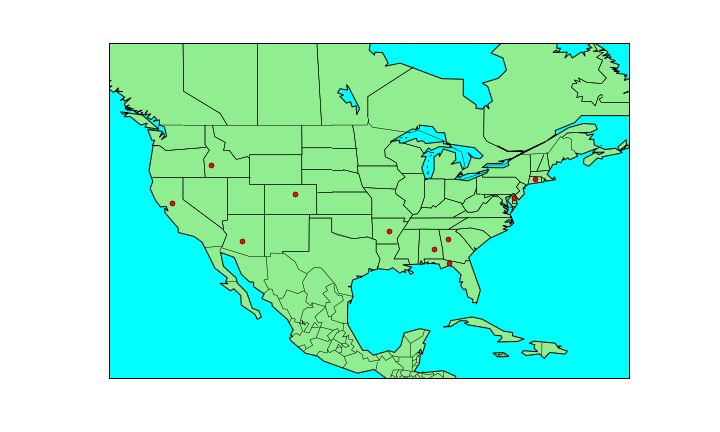
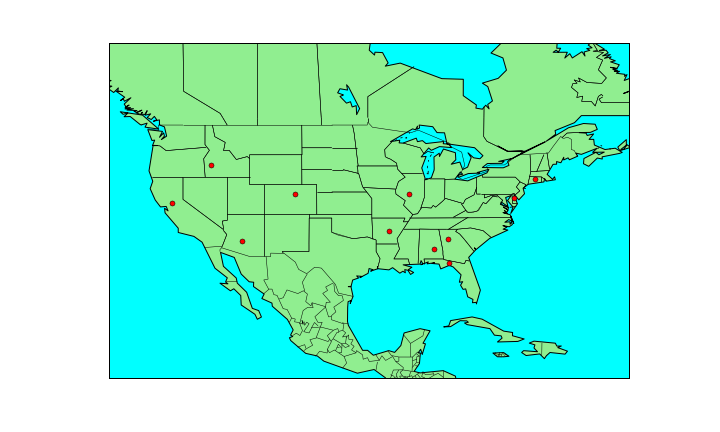
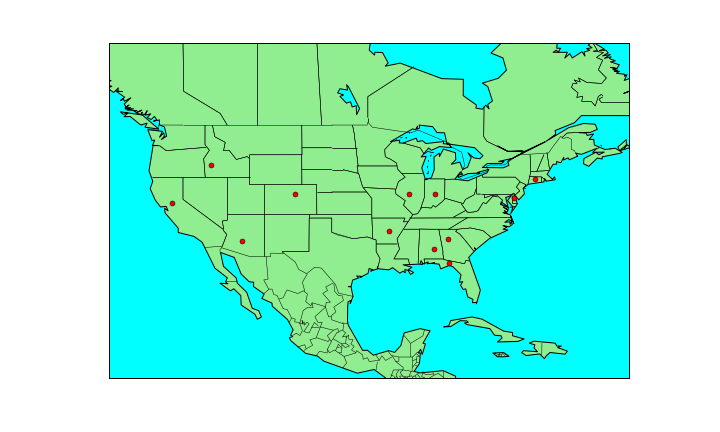
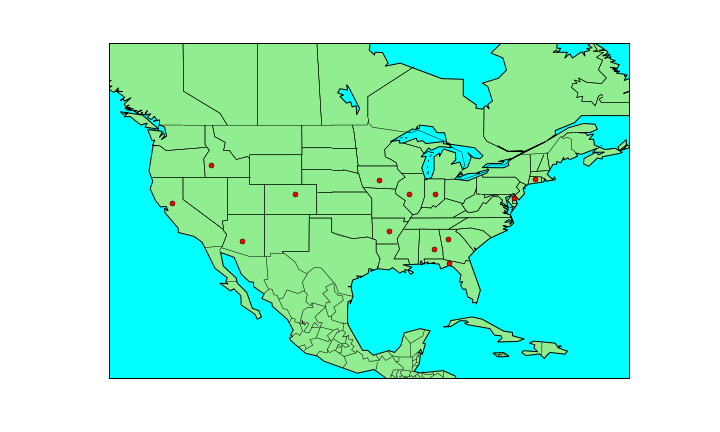
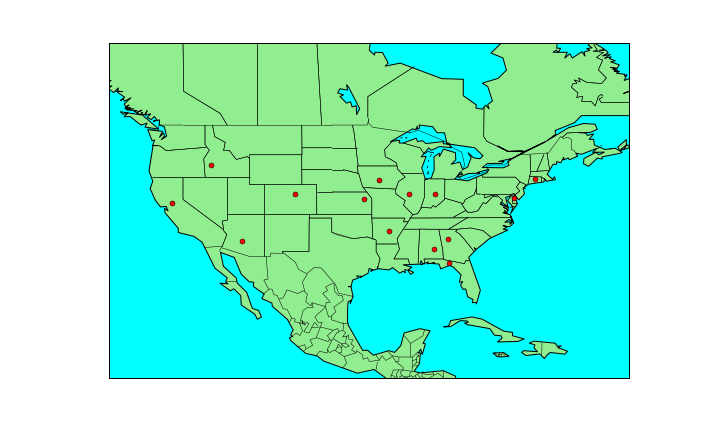
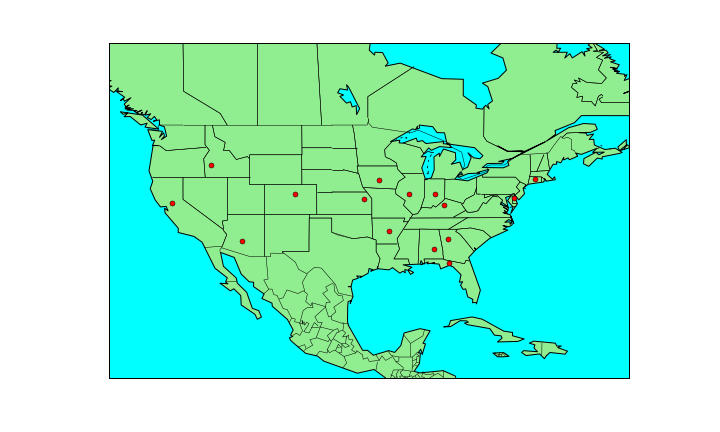
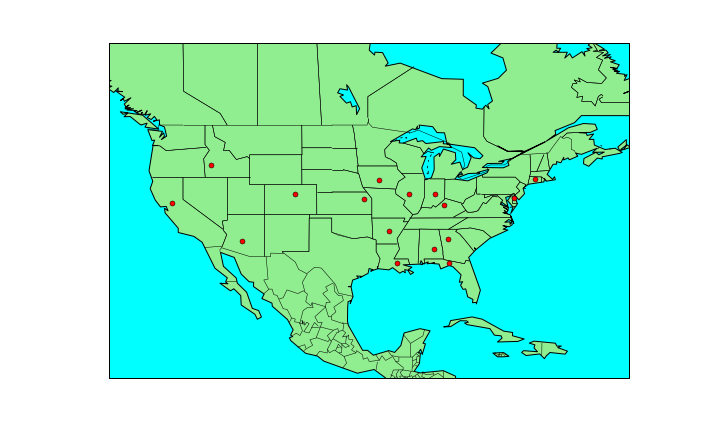
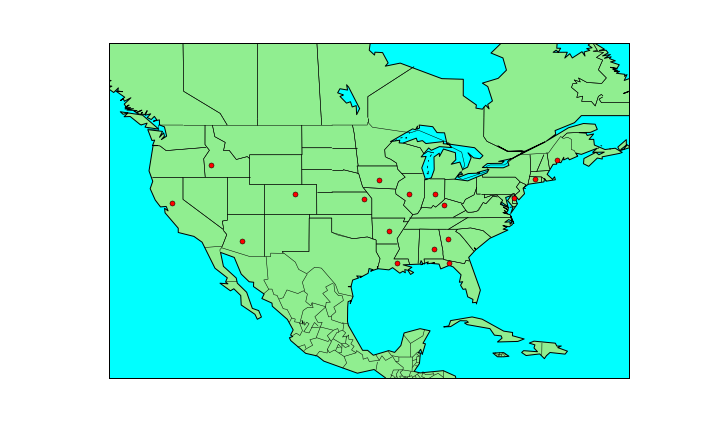
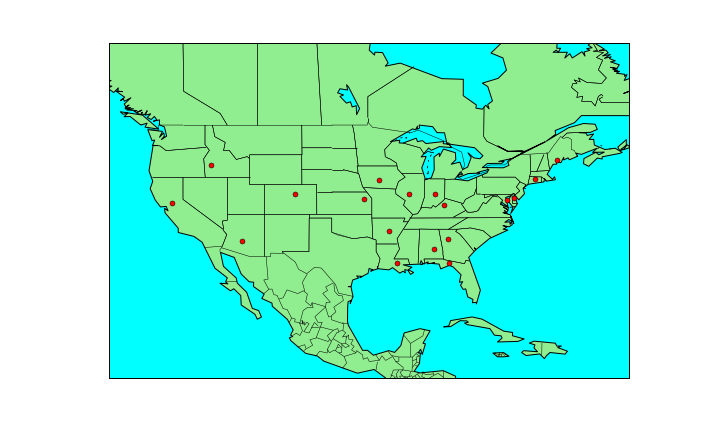
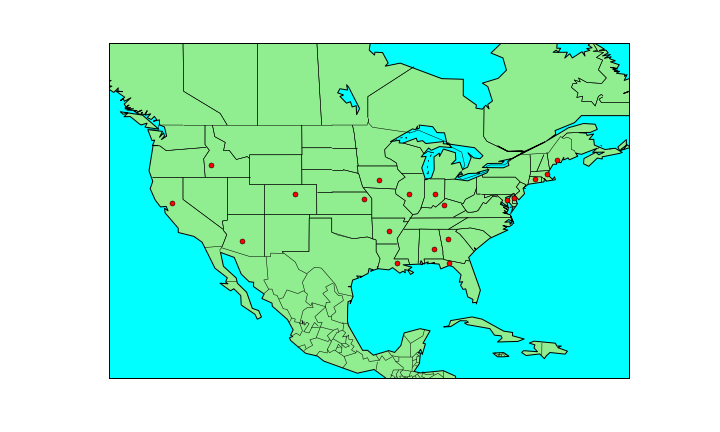
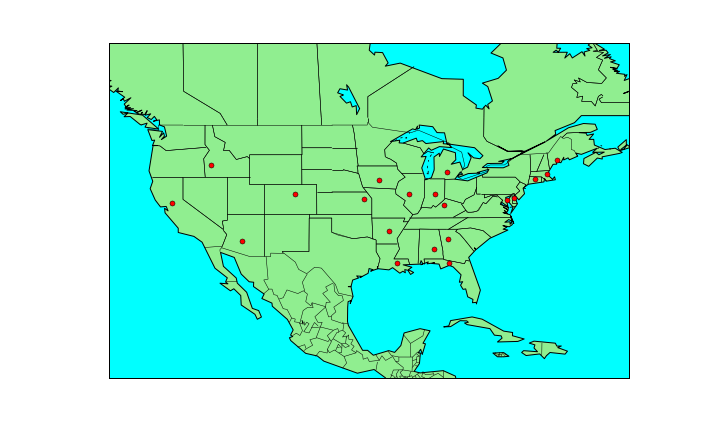
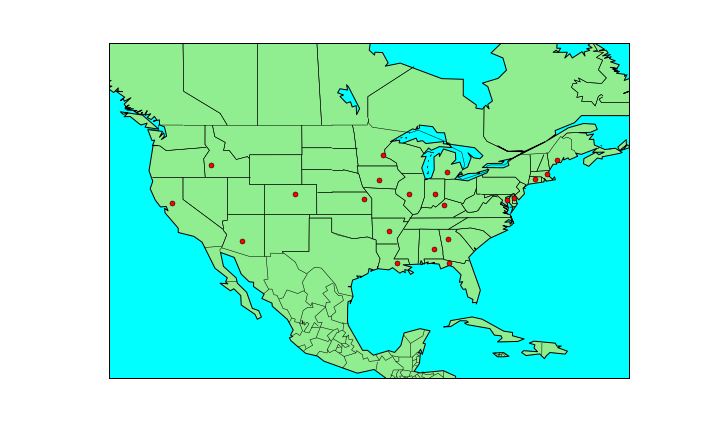
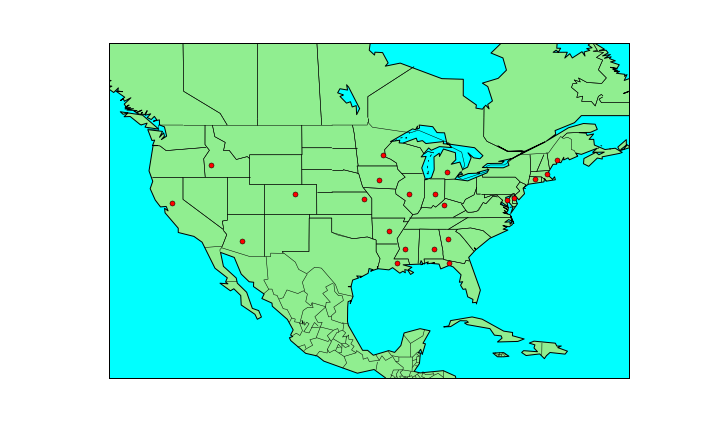
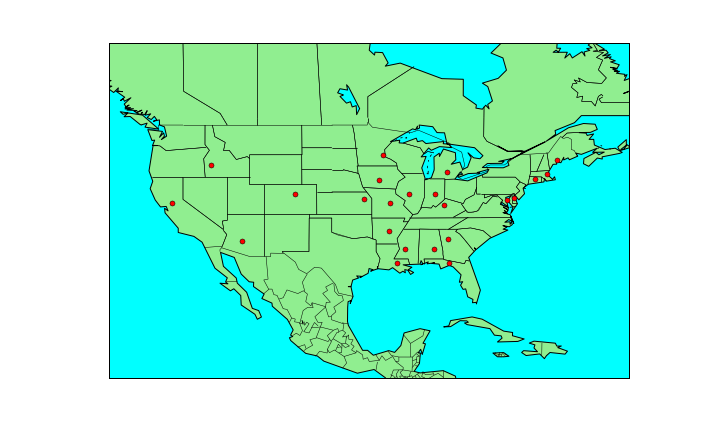
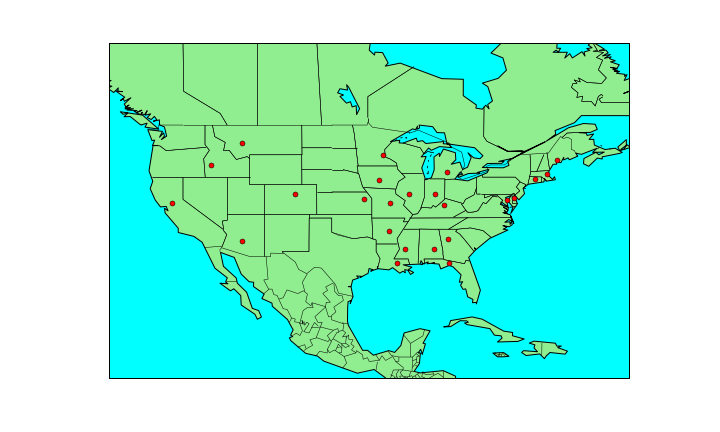
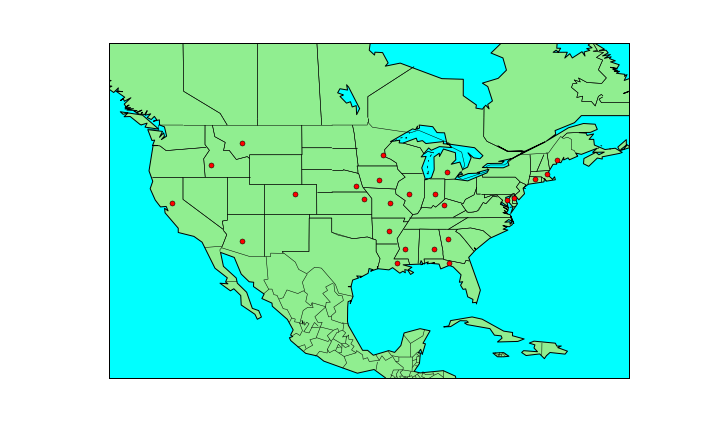
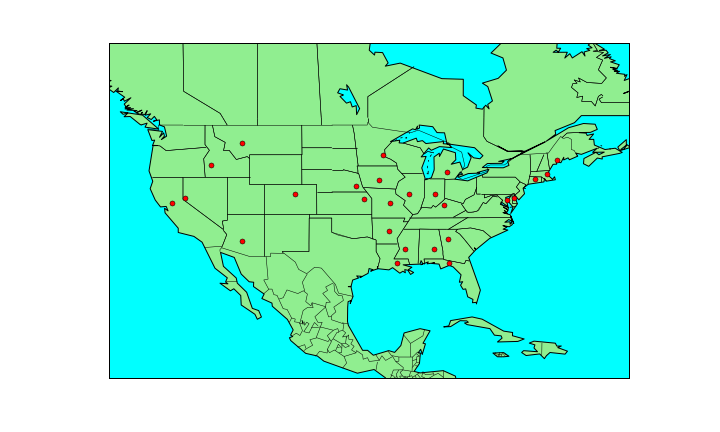
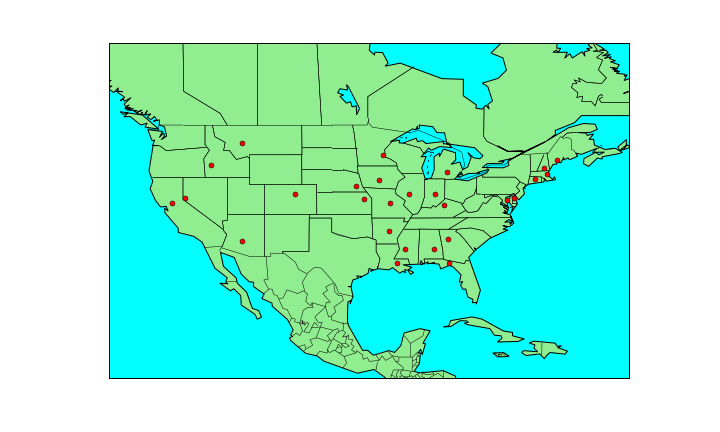
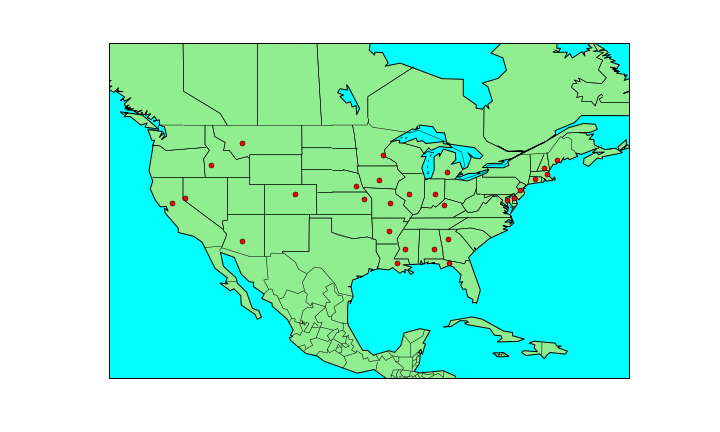
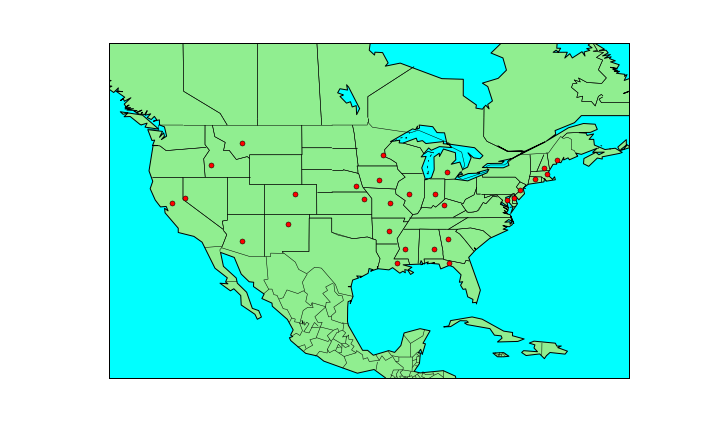
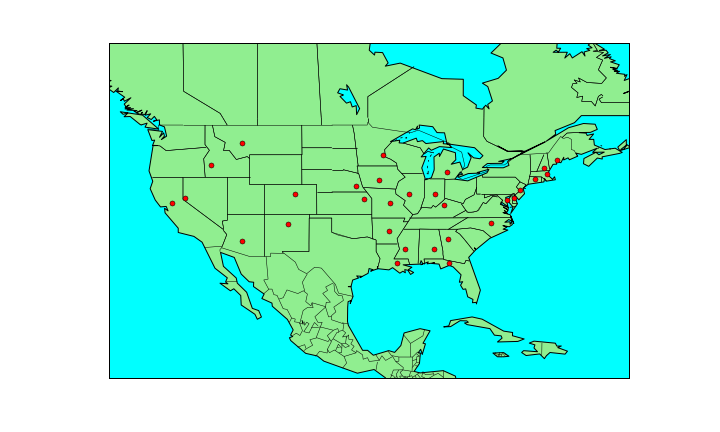
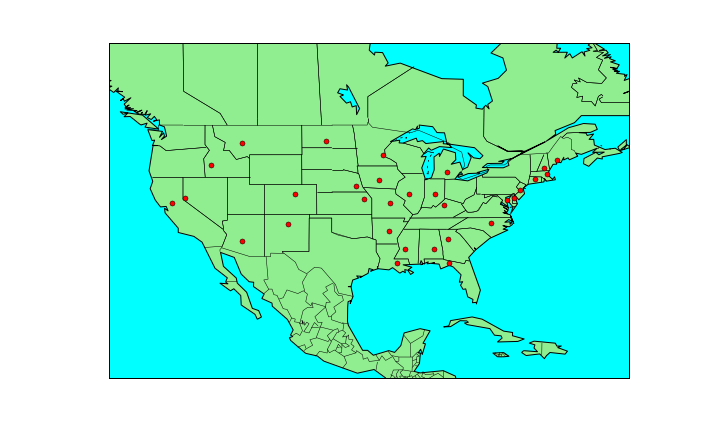
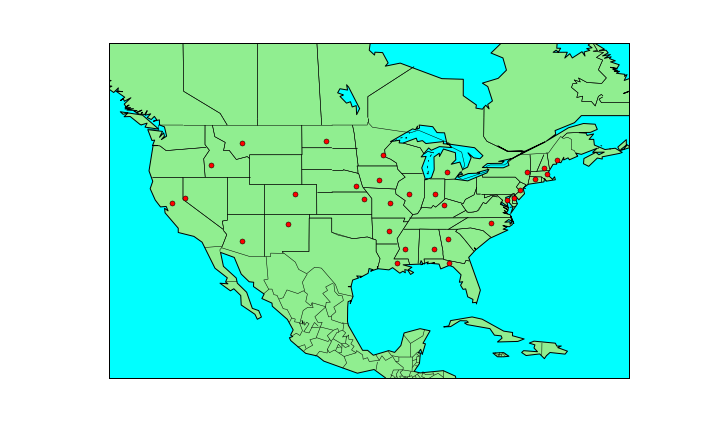
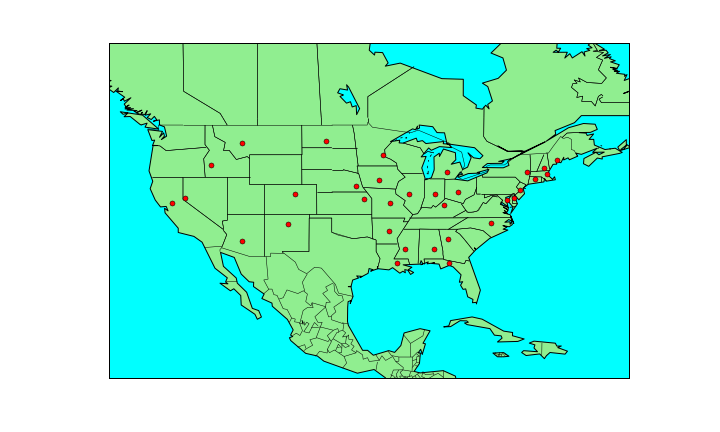
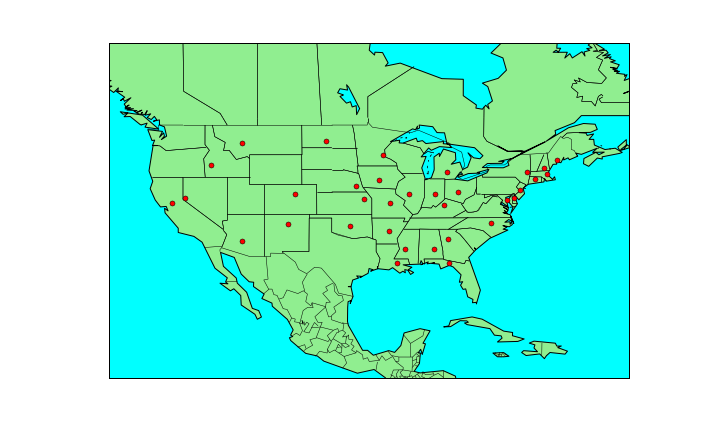
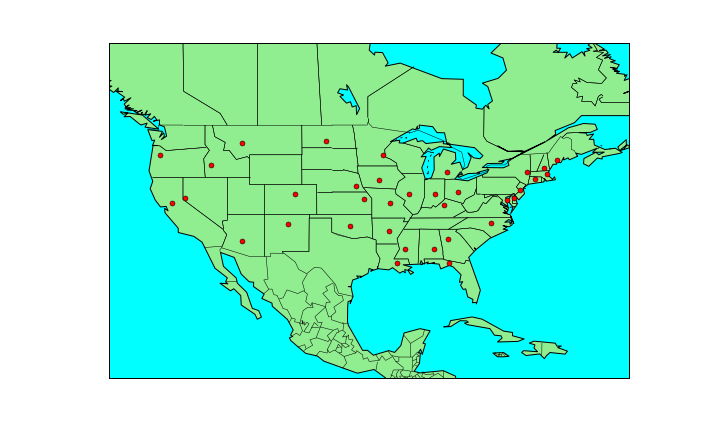
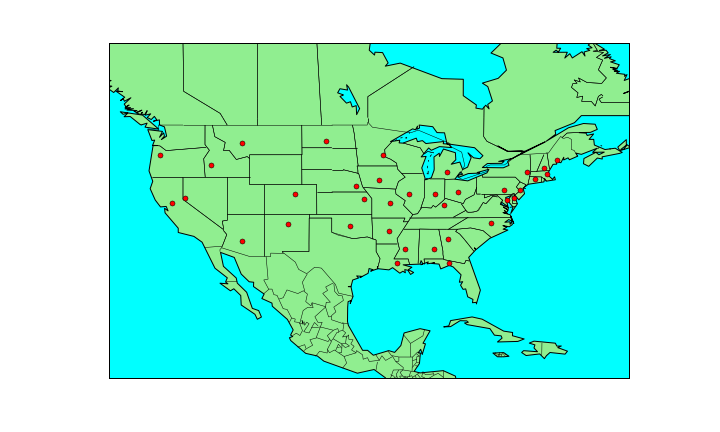
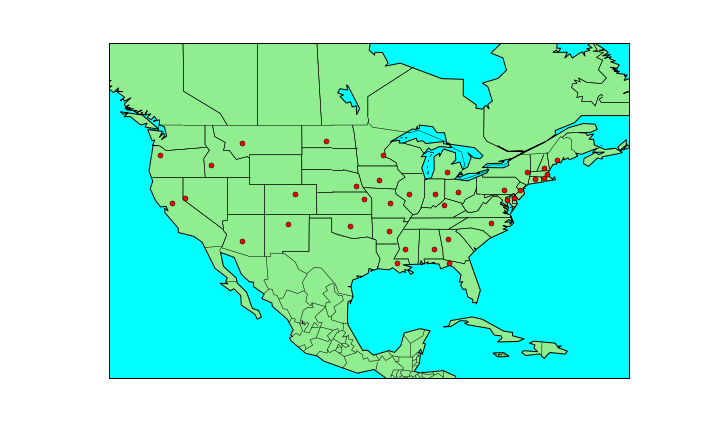
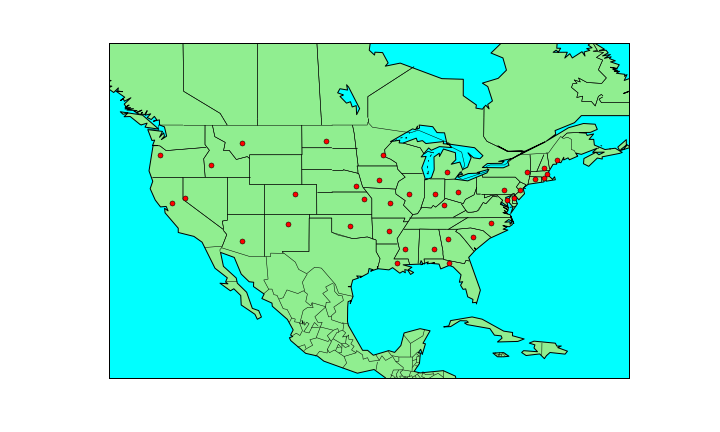
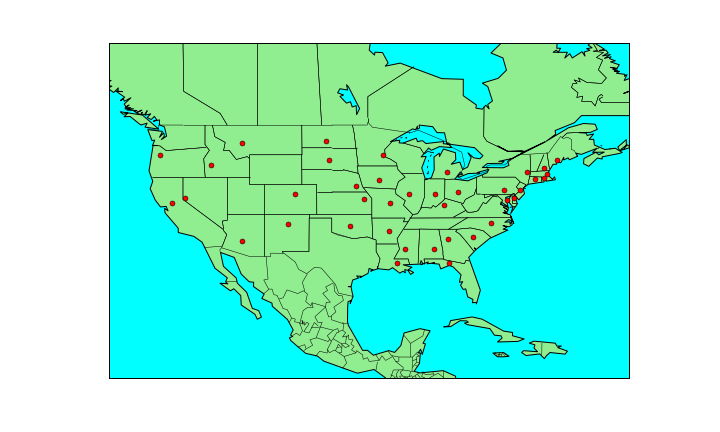
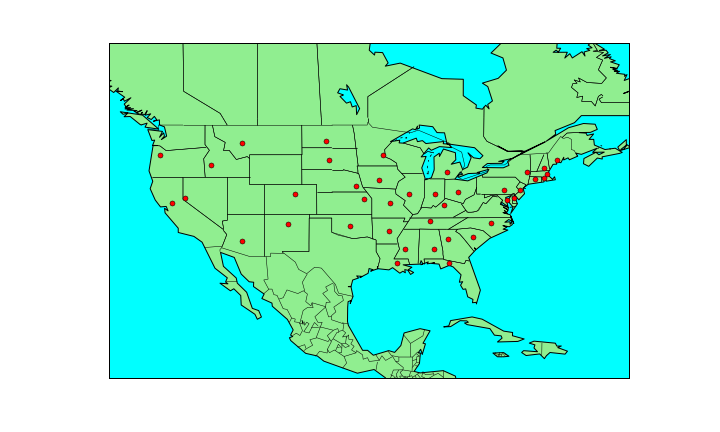
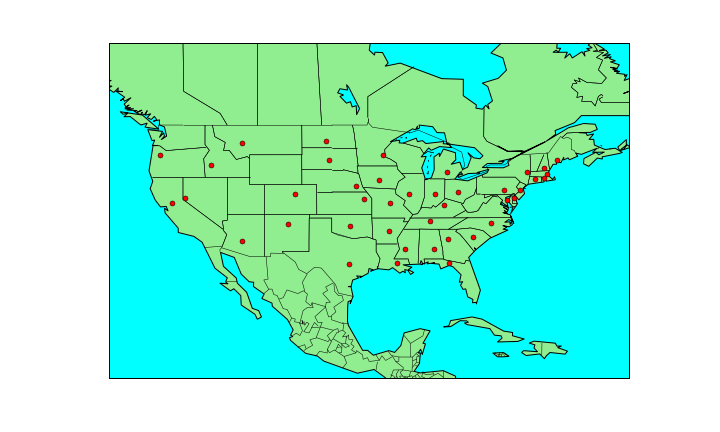
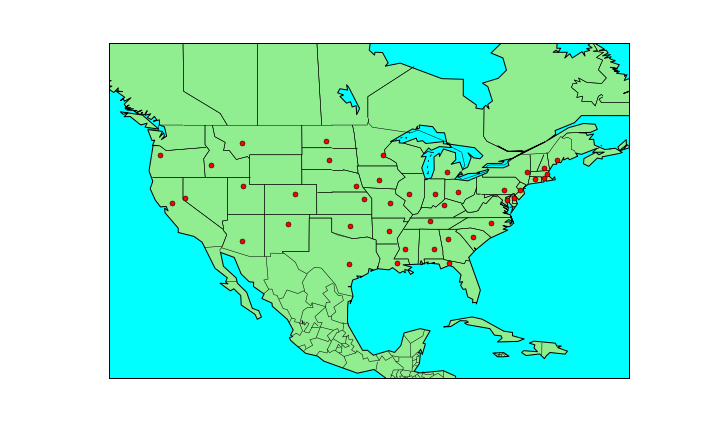
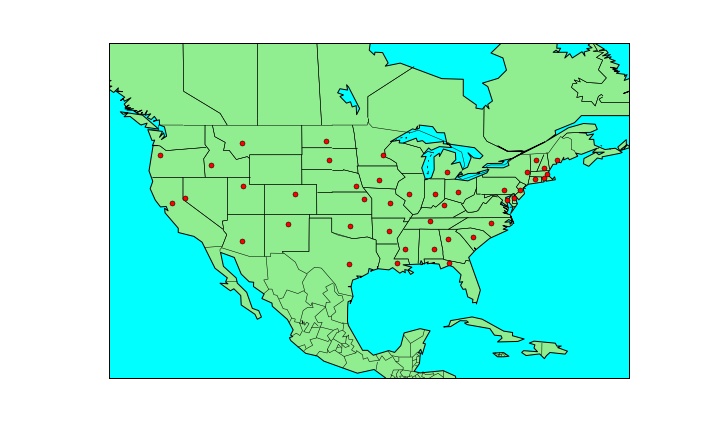
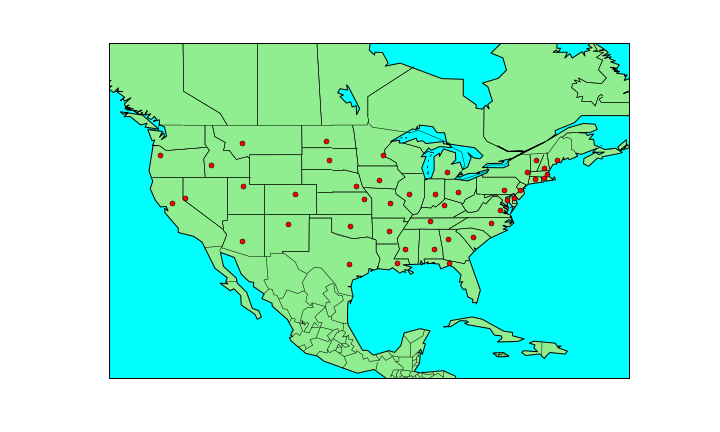
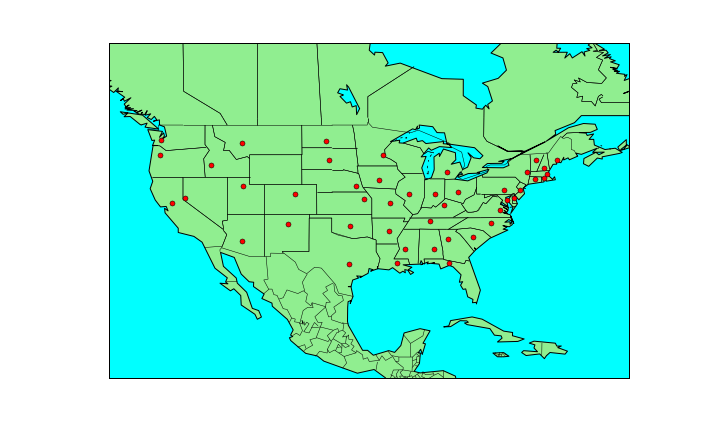
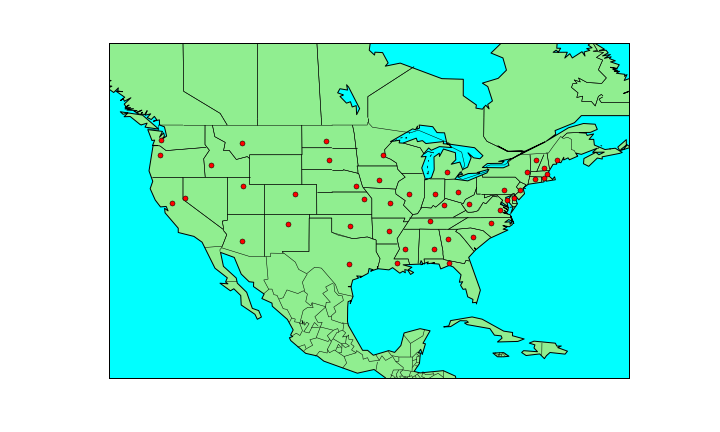
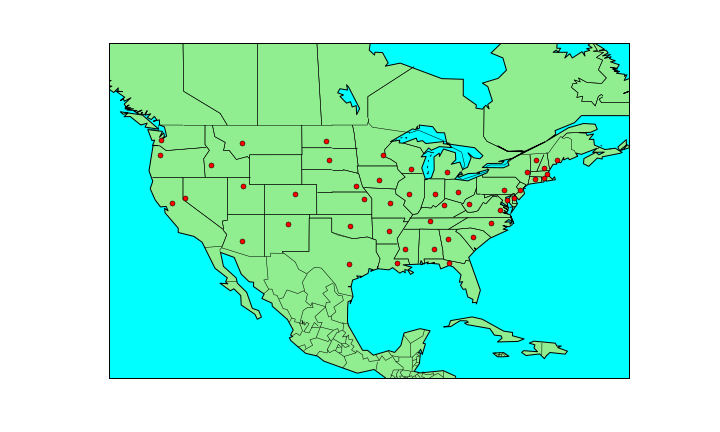
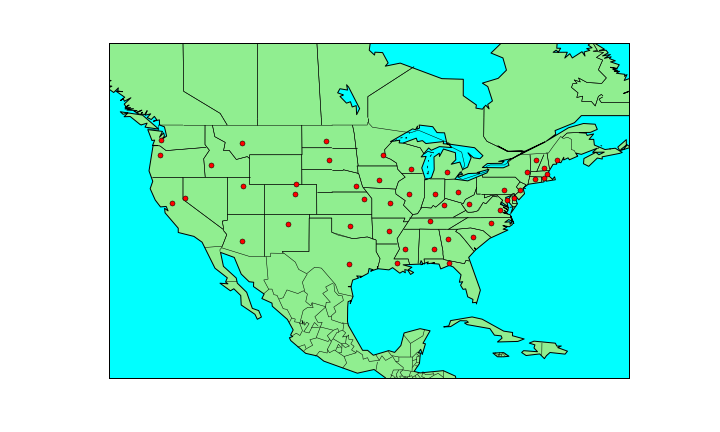

In [3]:
#Global Variables
lons = []
lats = []
iterr = 0

# re-initialize map
my_map = make_map(llcrnrlon = -130, llcrnrlat = 15, 
                  urcrnrlon = -60, urcrnrlat = 60)

# initialize point object
x,y = my_map(0, 0)
point = my_map.plot(x, y, 'ro', markersize=5)[0]

#Create a list of all the US capital coordinates
states = pd.read_csv('../data/us-state-capitals.csv')

#Create the initialization and animation functions
def init():
    point.set_data([], [])
    return point,

def animate(i):
    global lons
    global lats
    global iterr

    lats.append(states['latitude'][iterr])
    lons.append(states['longitude'][iterr])
    iterr += 1

    x, y = my_map(lons, lats)
    point.set_data(x, y)
    return point,

#Create the final animation
anim = animation.FuncAnimation(plt.gcf(), animate, init_func=init,
                               frames=50, interval=100, blit=True)
display_animation(anim)

The animation above will probably not render automatically when viewed on GitHub or the [earthlab/tutorials](earthlab.github.io) website, but the animation should be visible when viewed with [nbviewer](http://nbviewer.jupyter.org/github/earthlab/tutorials/blob/master/python/animated_maps.ipynb).

The basemap repository on GitHub has more great examples: [https://github.com/matplotlib/basemap/tree/master/examples](https://github.com/matplotlib/basemap/tree/master/examples).